# CUSTOMER SEGMENTATION
1️⃣Dataset :cusromer name,age,annual income,spending score
2️⃣Task: Apply Kmeans to cluster into clusters
        Visualize with 2D scatter plot (annual income vs spendind score)
        Label each cluster with (ex."high spend","low income","young savers")
3️⃣mini assingment: try 3 clusters then 5
                   use elbow method to find optimal k
                   Bonus:use age too (3D)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#task1 dataset:
age = np.random.randint(25,55,25)
annual_income_in_lakhs = np.random.uniform(3,50,25)
spendingscore = np.random.uniform(1,100,25)

names = ['sona','arun','arav','rohit','dimple','divya','vidya','manju','pari','sheetal','megha','sonu','sudhaker','anil','gaurav','suresh','chinu','savi','juhi','priya','rashmi','gauri','patel','leena','anuj']

data = pd.DataFrame({
    "Names": names,
    "Age": age,
    "Annual_income":  annual_income_in_lakhs,
    "Spending_Score": spendingscore
})
data

,Names,Age,Annual_income,Spending_Score
0,sona,35,5.058395,70.510207
1,arun,25,29.243519,58.197544
2,arav,48,10.729249,14.508028
3,rohit,27,42.281031,14.441192
4,dimple,33,32.634529,19.662677
5,divya,28,28.790067,15.429984
6,vidya,35,23.473873,48.591445
7,manju,30,40.322752,56.928977
8,pari,43,12.854616,80.662699
9,sheetal,42,40.843312,51.253357


In [3]:
# kmeans
x = data[["Annual_income","Spending_Score"]]
kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)
data['cluster']=kmeans.fit_predict(x)
print("cluster centroids\n:",kmeans.cluster_centers_)

cluster centroids
: [[22.22820827 54.39929943]
 [24.39054136 19.64878525]
 [31.08952591 90.4290602 ]]


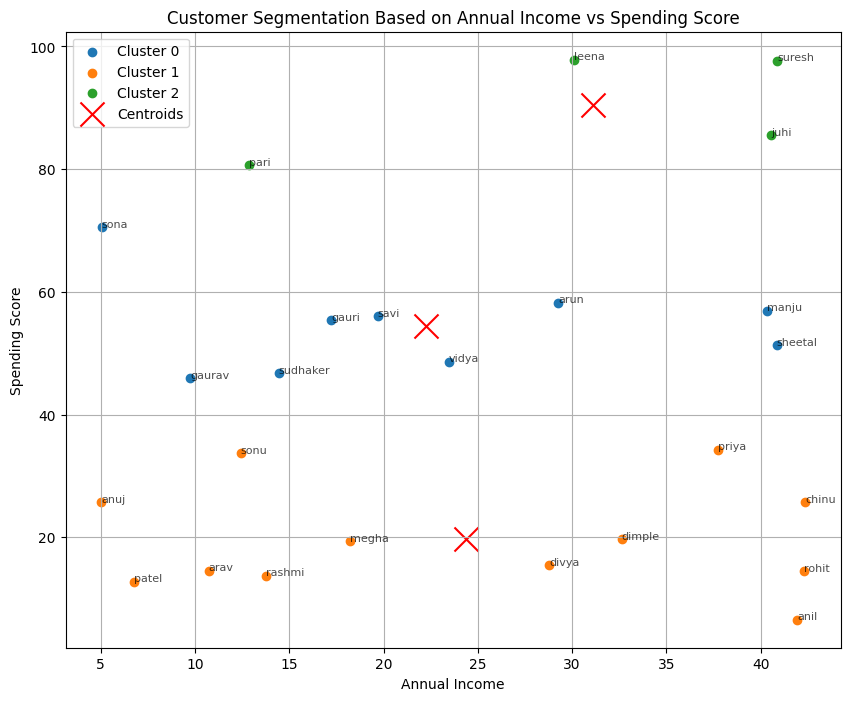

In [4]:
plt.figure(figsize=(10, 8))
for cluster in range(kmeans.n_clusters):
    cluster_data = data[data['cluster'] == cluster]
    # Scatter plot for each cluster
    plt.scatter(cluster_data['Annual_income'], cluster_data['Spending_Score'], label=f"Cluster {cluster}")
    # Add annotations for customer names
    for i in range(cluster_data.shape[0]):
        plt.text(cluster_data['Annual_income'].iloc[i],
                 cluster_data['Spending_Score'].iloc[i],
                 cluster_data['Names'].iloc[i], fontsize=8, alpha=0.7)

# Plotting centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='x', label='Centroids')
plt.title('Customer Segmentation Based on Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

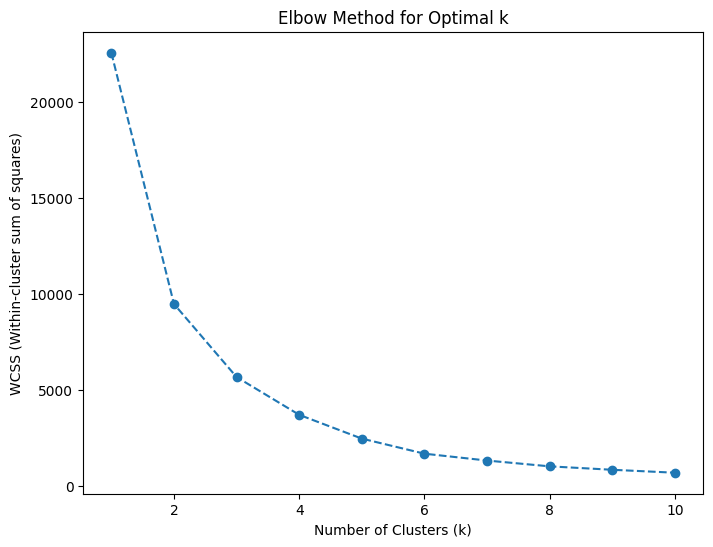

In [5]:
# elbow method

x = data[["Annual_income", "Spending_Score"]]
wcss=[]
k_values = range(1,11)

for k in k_values:
    kmeans = KMeans(n_clusters = k ,random_state=42,n_init=10 )
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker="o", linestyle="--")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

